# Subproject a
- Age vs eagerness to use platform correlation
- Author: Sergio S. (GitHub: esesancr) (mail: esesancr@gmail.com)

---

## Imports

#### Python libraries

In [1]:
import pandas as pd

import numpy as np

import os

import pprint

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

#### Ancillary modules

In [2]:
## Reloading module
%load_ext autoreload
%autoreload 2

from Sp_a_params import *
from Sp_a_funcs import *

---

## Upload and clean data

In [3]:
df = pd.read_csv(os.path.join(relative_data_loc, file_name))

In [4]:
cleaning_df(df)
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
3,362,SI,3: Neutral,2: Con poca regularidad,0
4,28,SI,4: Muy Común,3: Neutral,0
...,...,...,...,...,...
760,533,NO,4: Muy Común,5: Regularmente,0
761,201,NO,5: Totalmente Común,1: No la utilizaría,0
762,40,SI,2: Poco común,2: Con poca regularidad,0
763,63,NO,1: No será común,1: No la utilizaría,0


In order to avoid inconsistencies in the information we remove all dates `Fecha_nacimiento`$=0$

In [5]:
df.drop(df[df.Fecha_nacimiento=='0'].index,inplace=True) #"Removing" all date of birth==0.

In [6]:
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
5,501,SI,3: Neutral,3: Neutral,26/04/83
7,253,SI,3: Neutral,4: Con cierta regularidad,05/04/58
...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,27/01/58
756,22,SI,3: Neutral,2: Con poca regularidad,12/02/51
757,390,NO,1: No será común,3: Neutral,28/10/49
758,259,SI,4: Muy Común,1: No la utilizaría,27/12/67


Continuing with the cleaning and transformation process, the next step is to convert `Fecha_nacimiento` to its correct date and time format as shown below.

In [7]:
#Summary of the dataframe where 'Fecha_nacimiento' is in object format.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                738 non-null    int64 
 1   Considera_tele    738 non-null    object
 2   Cree_comun_tele   738 non-null    object
 3   Regularidad_uso   738 non-null    object
 4   Fecha_nacimiento  738 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.6+ KB


In [8]:
#Converting dtype object to datetime object
df["Fecha_nacimiento"] = pd.to_datetime(df["Fecha_nacimiento"])

In [9]:
#Summary of the dataframe where 'Fecha_nacimiento' is in datetime format.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                738 non-null    int64         
 1   Considera_tele    738 non-null    object        
 2   Cree_comun_tele   738 non-null    object        
 3   Regularidad_uso   738 non-null    object        
 4   Fecha_nacimiento  738 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ KB


In [10]:
df.Fecha_nacimiento

0     1970-03-26
1     1977-05-29
2     1978-01-01
5     1983-04-26
7     2058-05-04
         ...    
755   2058-01-27
756   2051-12-02
757   2049-10-28
758   2067-12-27
759   1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: datetime64[ns]

Pandas `to_datetime` function has a parsing error where for some convertions, the year is sometimes correct but sometimes not. For example date 27/12/67 is converted to 2067-12-27.

To correct this issue, we created the function `fix_date` that solves the parsing of wrong years

In [11]:
df['Fecha_nacimiento'] = df['Fecha_nacimiento'] .apply(fix_date) #Solving the parsing issue.
df.Fecha_nacimiento

0      1970-03-26
1      1977-05-29
2      1978-01-01
5      1983-04-26
7      1958-05-04
          ...    
755    1958-01-27
756    1951-12-02
757    1949-10-28
758    1967-12-27
759    1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: object

The next step is to calculate doctor's age based on birthday date. For this task we created a function called `compute_age`

In [12]:
df['Edad'] = df['Fecha_nacimiento'] .apply(compute_age) #Computing doctor's age.
df.Edad

0      50
1      43
2      42
5      37
7      62
       ..
755    62
756    69
757    71
758    53
759    40
Name: Edad, Length: 738, dtype: int64

In [13]:
df #Dataframe ready for the analysis

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento,Edad
0,721,SI,5: Totalmente Común,3: Neutral,1970-03-26,50
1,386,SI,3: Neutral,3: Neutral,1977-05-29,43
2,652,SI,2: Poco común,1: No la utilizaría,1978-01-01,42
5,501,SI,3: Neutral,3: Neutral,1983-04-26,37
7,253,SI,3: Neutral,4: Con cierta regularidad,1958-05-04,62
...,...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,1958-01-27,62
756,22,SI,3: Neutral,2: Con poca regularidad,1951-12-02,69
757,390,NO,1: No será común,3: Neutral,1949-10-28,71
758,259,SI,4: Muy Común,1: No la utilizaría,1967-12-27,53


## Initial data exploration

#### Histograms

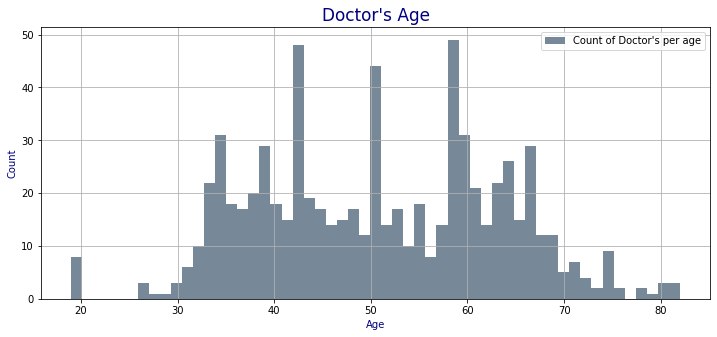

In [14]:
plot_hist(df,'Edad',55)

At first glance, we see above that there are some doctors who are under 20 years old. This behavior is probably an inconsistency in the database because the interviewed doctors are "Internists" and "Endocrinologists" who generally graduate after the age of 22 years old.

To avoid any incosistence in the information we decided to delete these records as follows:

In [15]:
df.drop(df[df.Edad<22].index,inplace=True) # "Removing" registers where doctor is younger than 22 yo 

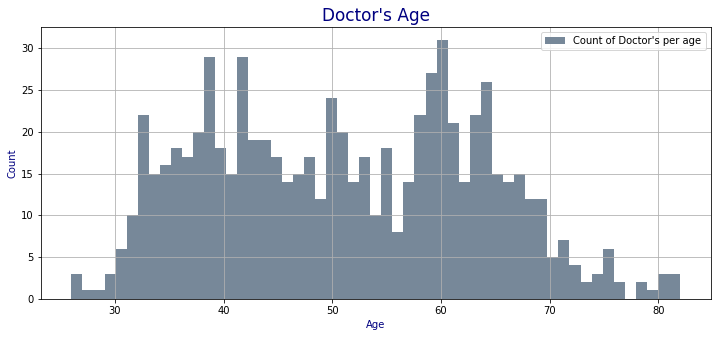

In [16]:
plot_hist(df,'Edad',55) #Histogram of count of doctors per age. 55 bins used

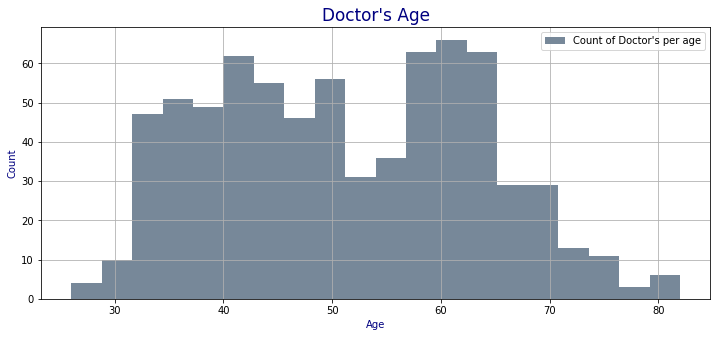

In [17]:
plot_hist(df,'Edad',20) #Histogram of count of doctors per age. 20 bins used

At this point we identify that this information looks like a bimodal distribution, where a good analysis could be try to identify if this distribution follows the behavior of a common known probability distribution. 

## Analysis 

### Doctor's age and his/her perception about the attractiveness of telemedicine

The objective of this analysis is to try to identify if there is already a relationship between doctor's age and his/her perception about the attractiveness of telemedicine.

The survey ansewerd by $765$ Internists and Endocrinologists contains a field called `Considera_tele` that answers the question **If they are willing to offer medical assistance (telemedicine)**

As first approach we plot the histogram showing the count of 'Negative' and 'Positive' perceptions of doctors grouped by doctor's age.

As we see below, line chart doesn't provide information to identify whether there is a relationship between doctor's age and his/her perception about telemedicine.

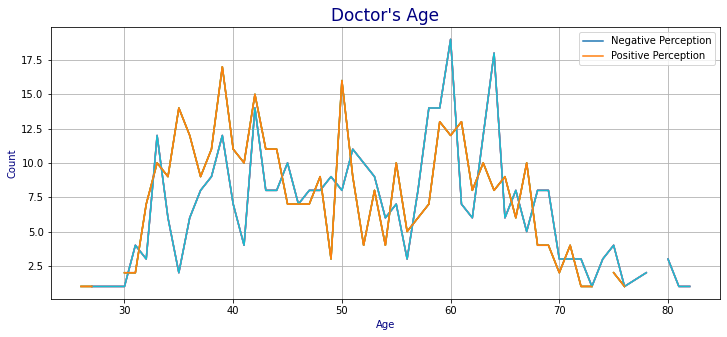

In [18]:
plot_line_groupedby(df,'Edad','Considera_tele')

In order to analyse doctor's willingness to offer telemedicine services, we need to separately analyze doctors perception and see if there is a correlation with their age. 

Due this, we created 2 groups that summarize 'negative and positive perception by age' and 'total count of perceptions by age'.

In [19]:
#Creating groups in order to summarize perception information.
ggroup_perc_count= df['ID'].groupby([df['Edad'],df['Considera_tele']]).count().reset_index() #Creating pandas df for count per perception
ggroup_total_count= df['ID'].groupby([df['Edad']]).count().reset_index() #Creating pandas df for total count

As next step, we merged both dataframes in order to mantain a unified record of perceptions and their relationship to the total.

This step is very important because it provides us the information that will allow us to calculate the **RATIO** of perceptions to the total.

In [20]:
ggroup_perc=pd.merge(ggroup_perc_count,ggroup_total_count,on='Edad') #Merging pandas df

#Renaming ggroup_perception cols names
rc = {
    'ID_x': 'Conteo',
    'ID_y':'Total'
    }

ggroup_perc.rename(rc, axis=1, inplace=True)

ggroup_perc

,Edad,Considera_tele,Conteo,Total
0,26,SI,1,1
1,27,NO,1,2
2,27,SI,1,2
3,28,NO,1,1
4,29,NO,1,1
...,...,...,...,...
103,79,SI,1,1
104,80,NO,3,3
105,81,NO,1,2
106,81,SI,1,2


In [21]:
ggroup_no = ggroup_perc.copy()
ggroup_si = ggroup_perc.copy()

ggroup_no.drop(ggroup_no[ggroup_no.Considera_tele=='SI'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='NO'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='No'].index,inplace=True) #"Removing".

Once we have the necessary information, we proceed with the convertion of the pandas dataframe to a NumPy array. This convertion obey the fact that we need NumPy arrays in order to use `polyfit` for the calculation of the Regression Model by the method of **Least squares polynomial fit**

In [22]:
np_neg_perc=ggroup_no.to_numpy() #Creating numpy array "Negative Perception" from pandas dataframe
np_pos_perc=ggroup_si.to_numpy() #Creating numpy array "Positive Perception" from pandas dataframe

In [23]:
#Negative Perception
x_neg=np.array(np_neg_perc[:,0],dtype=float)
y_neg=np.array(np_neg_perc[:,2],dtype=float)
y_neg_esc=np.array(np_neg_perc[:,2]/np_neg_perc[:,3],dtype=float)

#Positive Perception
x_pos=np.array(np_pos_perc[:,0],dtype=float)
y_pos=np.array(np_pos_perc[:,2],dtype=float)
y_pos_esc=np.array(np_pos_perc[:,2]/np_pos_perc[:,3],dtype=float)

## Linear Regression Model

Recalling what was seen in class, Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. 

In our case **the explanatory variable is the doctor's age**, and the **dependent variable is the Negative or Positive perception about the attractiveness of telemedicine**

Due we don't expect a regression line that must pass through the origin we opted for the **regression model with intercept**

$$f(x|\beta) = \beta_0 + \beta_1 x$$ $$(x_i,y_i)\forall i=0,1,\dots,m$$

where $\phi_0(x) = 1$, $\phi_1(x) =x$. And we need to calculate: $\beta_0, \beta_1$.

#### Negative Perception

Linear Regression that correlates doctor's age and their Negative perception about the attractiveness of telemedicine

In [24]:
ndegree = 1
coefficients = np.polyfit(x_neg,y_neg_esc,ndegree)
pprint.pprint(coefficients)

array([0.00432852, 0.28488185])


Then:

$$f(x|\beta) = \beta_0 + \beta_1 x$$

$$p_{np}(x) = 0.00432852x + 0.28488185$$

With our beta's adjusted as $\hat{\beta_0} = 0.28488185$, $\hat{\beta_1} = 0.00432852$.

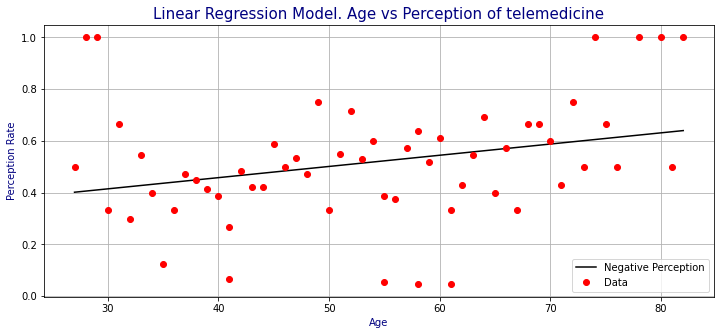

In [25]:
linear_regression(x_neg,y_neg_esc,1,"Negative Perception")

#### Positive Perception

Linear Regression that correlates doctor's age and their Positive perception about the attractiveness of telemedicine

In [26]:
ndegree = 1
coefficients = np.polyfit(x_pos,y_pos_esc,ndegree)
pprint.pprint(coefficients)

array([-0.0031727 ,  0.68710041])


Then:

$$f(x|\beta) = \beta_0 + \beta_1 x$$

$$p_{np}(x) = -0.0031727x + 0.68710041$$

With our beta's adjusted as $\hat{\beta_0} = 0.68710041$, $\hat{\beta_1} = -0.0031727$.

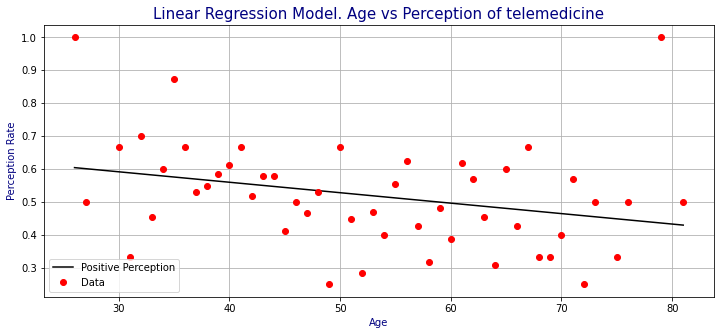

In [27]:
linear_regression(x_pos,y_pos_esc,1,"Positive Perception")

## Conclusion

As we could see in both analyzes, we corroborated that already exists a relationship between doctor's age and their willingness to offer telemedicine services and we concluded that **as doctors get older, they are less willing to offer telemedicine medical assistance services.**

---
---

# Subproject b
- Platform attributes
- Author: Cecilia Avilés Robles (GitHub: cecyar) (mail: cecyar@gmail.com)

---

## Packages installation and imports required

In [6]:
!pip install --user -q nltk

In [7]:
!pip install --user -q unidecode

In [8]:
!pip install --user -q wordcloud

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
import os
import nltk
from nltk import * 
from nltk.corpus import stopwords
from unidecode import unidecode

#import nltk.corpus
#from nltk import word_tokenize
#from nltk.tokenize import word_tokenize
#from nltk.probability import FreqDist

## Importing & Cleaning Data

First, we import the raw data and save it to a dataframe for further use.

In [11]:
data = pd.read_csv("project_data.csv")
data

,ID,ID del Médico,Codigo Medico,Especialidad del Médico,¿Ha considerado ofrecer consultas médicas a distancia (teleconsultas) a través de videoconferencias a sus pacientes?,"¿Del 1 al 5, qué tan común considera que será que sus pacientes soliciten teleconsultas médicas para atender sus padecimientos?","¿Cuenta con alguna plataforma digital que le ayude con la administración de sus servicios médicos (Por Ejemplo: con la gestión de citas, pagos, seguimiento a pacientes)?",¿Cuáles?,¿Cuenta con alguna plataforma digital para ofrecer teleconsultas?,¿Cuáles?2,Seleccione las funcionalidades que considera importantes para que estén presentes en una plataforma digital que lo apoye con la gestión de sus servicios médicos.,¿Cuánto estaría dispuesto a pagar mensualmente por el uso de la plataforma descrita?,"Si le ofrecieran una plataforma digital a un precio competitivo para facilitarle la gestión de su agenda de citas, cobros y seguimientos a pacientes, así como la posibilidad de llevar a cabo telec...",Fecha de nacimiento
0,721,1511533,1511533,Endocrinólogo,SI,5: Totalmente Común,SI,"No especifico, solicito llamada en agosto",SI,No especifico,"Solicito llamada después, estaba ocupada;",No pagaría por una,3: Neutral,26/03/70
1,386,1561268,1561268,Endocrinólogo,SI,3: Neutral,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,3: Neutral,29/05/77
2,652,1514853,1514853,Internista,SI,2: Poco común,NO,NaN,SI,Skype,Creación automática de videoconferencias con c...,No pagaría por una,1: No la utilizaría,01/01/78
3,362,2166821,2166821,Internista,SI,3: Neutral,NO,NaN,SI,"Whatsap, zoom, meet",Envío y recepción de documentos con cliente (e...,No pagaría por una,2: Con poca regularidad,0
4,28,..,..,Internista,SI,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,Menos de $750,3: Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,533,joel,joel,Internista,NO,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,5: Regularmente,0
761,201,OZ,OZ,Internista,NO,5: Totalmente Común,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,1: No la utilizaría,0
762,40,pitaluis,pitaluis,Internista,SI,2: Poco común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,2: Con poca regularidad,0
763,63,Q531206,531206,Internista,NO,1: No será común,NO,NaN,NO,NaN,Administración de citas;,No pagaría por una,1: No la utilizaría,0


The original column names are stored in a list (in case they are needed). Then, they are changed to a shorter name for easier manipulation.

In [12]:
column_names = list(data.columns)

In [13]:
data.columns = ['ID', 'IDMED', 'COD', 'ESP', 'P1_CONSULTAS', 'P2_RANKING', 'P3_PLAT ADMON', 'R3', 'P4_PLAT CONSULTA',
               'R4', 'P5_ATRIBUTOS', 'P6_PAGO', 'P7_DISPOSICION', 'FNAC'] 

The objective of this subproject is to analyze _"what are the attributes that doctors value the most in a technological platform that enhances their services"_. This data is repesented in the answers given in column `P5_ATRIBUTOS`, therefore it will be stored in a separate object for further analysis.

In [14]:
attributes = data["P5_ATRIBUTOS"]
attributes.size

765

## Data Analysis

Since the data we are working with is of the type `string`, it will be first saved in a `list` that will be converted to a `string` afterwards.

In [15]:
raw_attributes = []

for i in range(0, attributes.size):
    text_i = str(attributes[i])
    raw_attributes.append(text_i)      #List

text_attributes = str(raw_attributes)  #String

Then, the default answers are defined in different variables and are used to create an array named `answers`.

In [16]:
answer_1a = "Creación automática de videoconferencias con clientes"
answer_1b = "Creación automática de videoconferencias"
answer_2 = "Envío y recepción de documentos con cliente (estudios, recetas médicas)"
answer_3 = "Administración de citas"
answer_4 = "Gestión de pagos"
answer_5 = "Despliegue de encuestas de satisfacción de clientes"
answer_6 = "Aplicación de promociones de descuento para clientes"

answers = [answer_1a, answer_1b, answer_2, answer_3, answer_4, answer_5, answer_6]

The array `answers` is used to count the number of occurrences each answer has in the string `text_attributes`.

In [17]:
pre_counts = []

for i in range(0, len(answers)):
    count_i = text_attributes.count(answers[i])
    pre_counts.append(count_i)

The occurrences were stored in the arrary `pre_counts`. Since the default _answer 1_ was changed during the interview period, there are two possible answers that refer to the same one. Therefore, entries $0$ and $1$ are added to correctly represent this occurrence. The appropriate counts are stored in array `counts`.

In [18]:
counts = [pre_counts[0] + pre_counts[1], pre_counts[2], pre_counts[3], pre_counts[4], pre_counts[5], pre_counts[6]]
counts

[536, 363, 379, 245, 90, 111]

**Plotting the default answers**

Creating a label to be used in the plot.

In [19]:
label = "1. "+answer_1a+"\n"+"2. "+answer_2+"\n"+"3. "+answer_3+"\n"+"4. "+answer_4+"\n"+"5. "+answer_5+"\n"+"6. "+answer_6

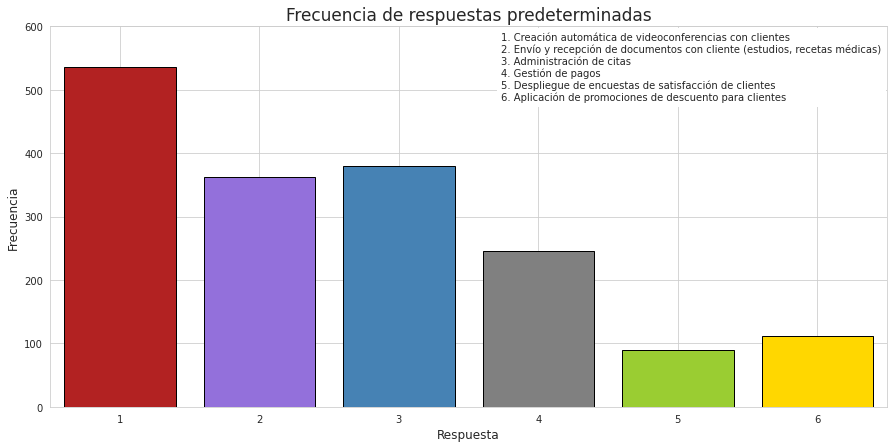

In [20]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,7))

x = np.arange(1,7,1)
plt.bar(x, counts, color = ["firebrick","mediumpurple","steelblue","gray","yellowgreen","gold"], edgecolor = "black")
plt.text(3.73, 483, label, bbox = {"facecolor": "white"})  
plt.axis([0.5, 6.5, 0, 600])
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 17)
plt.xlabel("Respuesta", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.show()

We then want to show the default answers by percentages. For this matter, we will use a pie chart.

In [49]:
pie_answers = [answer_1a, answer_2, answer_3, answer_4, answer_5, answer_6]
plot_info = pd.DataFrame({"Answer": pie_answers, "Freq": counts,})
pie_info = plot_info.sort_values(by = "Freq", ascending = False)

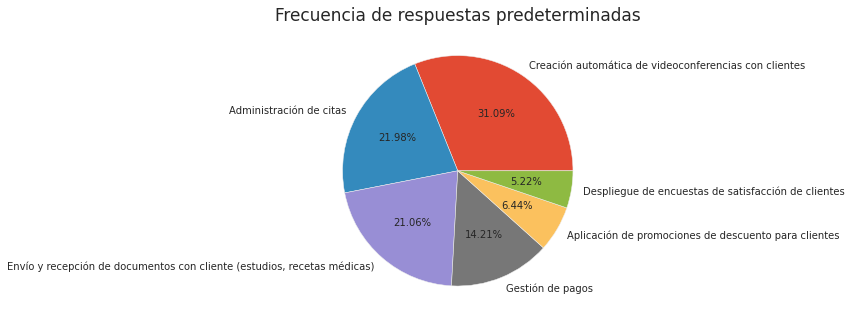

In [50]:
sns.set_style("whitegrid")
plt.style.use("ggplot")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(pie_info.Freq, labels = pie_info.Answer, autopct = "%1.2f%%")
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 17)
plt.show()

Next, we want to show if there is any correlation between the age of the doctors and their disposition to use an online platform (represented by selecting some of the default answers or no).

For this, a new dataframe `birth_info` will be created with columns `P5_ATRIBUTOS`and `FNAC` of the raw data.

In [51]:
attributes2 = data["P5_ATRIBUTOS"]
birthdates = data["FNAC"]

In [24]:
birth_info = pd.DataFrame({'BirthDate': birthdates, 'Attributes': attributes2,})

Then, we calculate an _approximate age_ based only on the birth year. We create a list `year` with this calculation, and then append it to the dataframe `birth_info`.

In [25]:
year = []
for i in range(0,birth_info.shape[0]):
    year_i = 120 - int(birth_info.BirthDate[i][-2:])
    year.append(year_i)

In [26]:
dfyear = pd.DataFrame(year, columns = ["Age"])

In [27]:
birth_info["Age"] = dfyear["Age"]

Now we add new `flag` columns to indicate whether a default answer was selected ("Yes") or no ("No"). Additionally, the same is done for the optinal answer _"Todas"_.

In [28]:
birth_info['A1_flag'] = np.where(birth_info['Attributes'].str.contains(answer_1b), 'Yes', 'No')
birth_info['A2_flag'] = np.where(birth_info['Attributes'].str.contains("Envío y recepción de documentos con cliente"), 'Yes', 'No')
birth_info['A3_flag'] = np.where(birth_info['Attributes'].str.contains(answer_3), 'Yes', 'No')
birth_info['A4_flag'] = np.where(birth_info['Attributes'].str.contains(answer_4), 'Yes', 'No')
birth_info['A5_flag'] = np.where(birth_info['Attributes'].str.contains(answer_5), 'Yes', 'No')
birth_info['A6_flag'] = np.where(birth_info['Attributes'].str.contains(answer_6), 'Yes', 'No')
birth_info['An_flag'] = np.where(birth_info['Attributes'].str.contains("Todas"), 'Yes', 'No')
birth_info.shape

(765, 10)

Later, we delete the rows in which no birth date was given, to exlude them from our analysis.

In [52]:
indexNames = birth_info[ (birth_info['Age'] == 120) | (birth_info['Age'] == 119) ].index
birth_info.drop(indexNames, inplace = True)
birth_info.shape

(730, 11)

Then, function `answers_pre` is defined to evaluate whether a `flag` column has `Yes` or `No`. It is later added to the dataframe `birth_info` in the new column `Boolean_Answer`.

In [53]:
def answers_pre (row):
   if row["A1_flag"] == "Yes" :
      return "Yes"
   if row["A2_flag"] == "Yes" :
      return "Yes"
   if row["A3_flag"] == "Yes" :
      return "Yes"
   if row["A4_flag"] == "Yes":
      return "Yes"
   if row["A5_flag"]  == "Yes":
      return "Yes"
   if row["A6_flag"] == "Yes":
      return "Yes"
   if row["An_flag"] == "Yes":
      return "Yes"
   return "No"

In [54]:
birth_info['Boolean_Answer'] = birth_info.apply (lambda row: answers_pre(row), axis = 1)

Lastly, two sub dataframes are created both containing the age of the doctor. The first one is for when the doctor selected one of the default answers (`yes_df`), the second one for when he did not (`no_df`).

In [55]:
yes_df = birth_info[birth_info['Boolean_Answer'] == "Yes"]
yes_df.shape

(627, 11)

In [56]:
no_df = birth_info[birth_info['Boolean_Answer'] == "No"]
no_df.shape

(103, 11)

Now we use these two sub dataframes to plot the age distribution of the two.

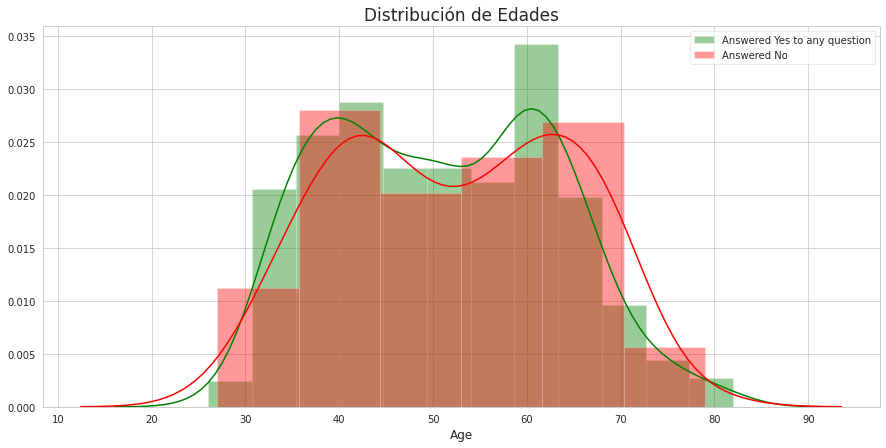

In [57]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,7))

sns.distplot(yes_df["Age"], color = "green", label = "Answered Yes to any question")
sns.distplot(no_df["Age"], color = "red", label = "Answered No")
plt.title("Distribución de Edades", fontsize = 17)
plt.legend()

We combine the two sub dataframes in order to make a scatter plot.

In [58]:
yes_info = pd.DataFrame({"Age": yes_df.Age, "Boolean_Ans": yes_df.Boolean_Answer,})
no_info = pd.DataFrame({"Age": no_df.Age, "Boolean_Ans": no_df.Boolean_Answer,})
scatter_info = yes_info.append(no_info)

Text(0.5, 1.0, 'Dispersión de Edades')

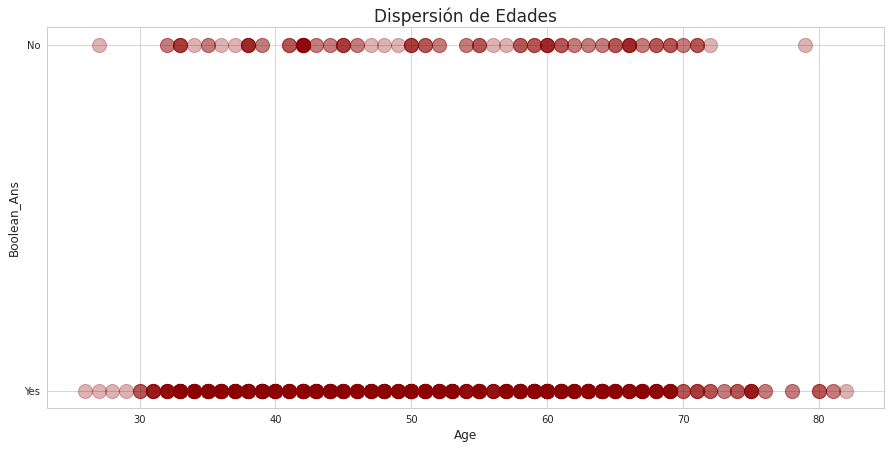

In [60]:
fig = plt.figure(figsize = (15,7))
sns.set_style("whitegrid")

sns.regplot(x = scatter_info["Age"], y = scatter_info["Boolean_Ans"], fit_reg = False, scatter_kws = {"color":"darkred","alpha":0.3,"s":200})
plt.title("Dispersión de Edades", fontsize = 17)

Based on the distribution and scatter plots, we conclude that there is no correlation between the age of the doctors and their disposition to use an online platform (represented by selecting some of the default answers or no).

## Analyzing the inputs from the _optional_ answer (written data)

In case the doctor did not want to select one of the default answers, there was an _optional_ 7th answer in which they could write whatever they wanted. This "free text" needs to be part of the analysis.

We start by deleting the default answers from the string `text_attributes` and stored the new string in `pre_written_answers`.

In [37]:
pre_written_ans = text_attributes

for i in range(0, len(answers)):
    pre_written_ans = pre_written_ans.replace(str(answers[i]),"")
    
#print(pre_written_ans)        #Remove the hashtag at the beginning to see the result

This new string has to be filtered in order to remove characters as `;`, `'`, `,`, `[`, `]`, `(` and `)`. This is achieved with the following line of code.

In [61]:
pre_written_ans = pre_written_ans.translate({ord(i): None for i in ";',[]()"})
#pre_written_ans               #Remove the hashtag at the beginning to see the result

Now we remove all special characters and change the words to lowercase.

In [62]:
pre_written_ans = unidecode(pre_written_ans).lower()
#pre_written_ans               #Remove the hashtag at the beginning to see the result

In order to obtain a better analysis, the words defined in array `to_replace` will be changed with the words defined in array `replaced`. This new string is saved in `written_ans`.

In [40]:
to_replace = ["intereza", "interezado", "interesaria", "interesado", "."]
replaced = ["interesa", "interesa", "interesa", "interesa", ""]

In [63]:
written_ans = pre_written_ans

for i in range(0, len(to_replace)):
    written_ans = written_ans.replace(to_replace[i],replaced[i])
    
#written_ans                 #Remove the hashtag at the beginning to see the result

Now, I will use the info provided in [Text Mining in Python](https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b) to do some language processing.

First, we do a _tokenization_, which means breaking the string into tokens which in turn are small structures or units.

In [64]:
nltk.download('punkt')

token_words = word_tokenize(written_ans)

[nltk_data] Downloading package punkt to /home/miuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then, we find the frequency of each token in order to identify and show the top 30 words.

In [66]:
fdist = FreqDist(token_words)
fdist_top = fdist.most_common(30)
fdist_top

[('no', 57),
 ('que', 19),
 ('interesa', 19),
 ('ninguna', 16),
 ('le', 13),
 ('de', 12),
 ('el', 11),
 ('la', 11),
 ('me', 9),
 ('en', 8),
 ('a', 8),
 ('todo', 7),
 ('esta', 7),
 ('todas', 6),
 ('calidad', 6),
 ('y', 6),
 ('lo', 6),
 ('informacion', 6),
 ('por', 6),
 ('es', 5),
 ('con', 5),
 ('nos', 5),
 ('se', 5),
 ('o', 4),
 ('hospital', 4),
 ('muy', 4),
 ('buena', 3),
 ('apoye', 3),
 ('he', 3),
 ('mi', 3)]

We can see there are a lot of words that do not offer any value for the analysis. These are called _"Stop words"_ and are interpreted as the most common words in any language (in spanish they will be equivalent to _artículos, preposiciones, conjunciones, etc._). These words do not provide any meaning and are usually removed from texts. We will remove these stop words with the following code.

In [71]:
nltk.download("stopwords")
a = set(stopwords.words("spanish"))

pre_processed_text = word_tokenize(written_ans.lower())
processed_text = [x for x in pre_processed_text if x not in a]

#print(processed_text)            #Remove the hashtag at the beginning to see the result

[nltk_data] Downloading package stopwords to /home/miuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Again, we find the frequency of each token in order to identify and show the top 30 words.

In [73]:
fdist2 = FreqDist(processed_text)

In [74]:
fdist_top2 = fdist2.most_common(30)
fdist_top2

[('interesa', 19),
 ('ninguna', 16),
 ('todas', 6),
 ('calidad', 6),
 ('informacion', 6),
 ('hospital', 4),
 ('buena', 3),
 ('apoye', 3),
 ('necesita', 3),
 ('usaria', 3),
 ('pacientes', 3),
 ('varias', 3),
 ('momento', 3),
 ('plataformas', 3),
 ('usa', 2),
 ('whats', 2),
 ('app', 2),
 ('creo', 2),
 ('especificar', 2),
 ('solo', 2),
 ('seguimiento', 2),
 ('dar', 2),
 ('informativa', 2),
 ('realmente', 2),
 ('ver', 2),
 ('util', 2),
 ('bueno', 2),
 ('solicito', 1),
 ('llamada', 1),
 ('despues', 1)]

We can see there is a better analysis of the written words. We will use this information to plot a Word Cloud for academic purposes.

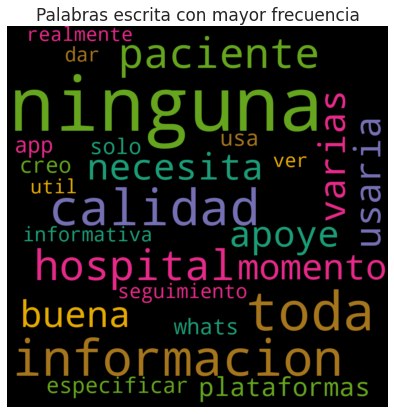

In [85]:
str_processed_text = str(processed_text)
str_processed_text = str_processed_text.translate({ord(i): None for i in "',"})

fig = plt.figure(figsize = (7,7))
wordcloud = WordCloud(width = 1000, height = 1000, margin = 0, colormap = "Dark2", 
                      max_words = 25, stopwords = ["interesa", "todas"]).generate(str_processed_text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.title("Palabras escrita con mayor frecuencia", fontsize = 17)
plt.show()

**Conclusion**

Our sample size consists of $765$ answers given by 765 doctors. The $82$% selected one of the default answers versus the $13$% that did not, the $5$% did not provide their birth date information.

From the $13$% that choose not to select one of the default answers, we analyzed the given text. 
* The most common given answer was negative towards the digital platform, representing roughly the $10$% of the total sample (57 `No` plus 19 `Ninguna`). 
* Almost the $1.5$% value either the _quality_ or the _information_ available on hypothetical digital platform. 
* The rest of the common words do not provide any significant information due to very low sample size and no specific trend observed.

---
---

# Subproject c
- Test for independence of selected survey responses
- Author: Roberto P. (GitHub: Roberto919) (mail: robertosysm@gmail.com)

---

## Imports

#### Python libraries

In [1]:
import pandas as pd

import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.stats import chi2_contingency, chi2

import numpy as np

#### Ancillary modules

In [2]:
## Reloading module
%load_ext autoreload
%autoreload 2

from Sp_c_params import *
from Sp_c_funcs import *

---

## Upload and clean data

In [3]:
df = pd.read_csv(os.path.join(relative_data_loc, file_name))

In [4]:
cleaning_df(df)

In [5]:
df

,ID,Considera_tele,Cree_comun_tele,Pagar_cuanto,Regularidad_uso
0,4,NO,1: No será común,No pagaría por una,1: No la utilizaría
1,5,NO,2: Poco común,Menos de $100,2: Con poca regularidad
2,6,NO,2: Poco común,Menos de $750,2: Con poca regularidad
3,7,SI,3: Neutral,No pagaría por una,1: No la utilizaría
4,8,NO,2: Poco común,Menos de $100,1: No la utilizaría
...,...,...,...,...,...
749,753,NO,5: Totalmente Común,Más de $750,5: Regularmente
750,754,SI,5: Totalmente Común,Más de $750,5: Regularmente
751,755,SI,5: Totalmente Común,Más de $750,5: Regularmente
752,756,SI,2: Poco común,Menos de $100,3: Neutral


---

## Initial data exploration

In [6]:
dfx = df.copy()

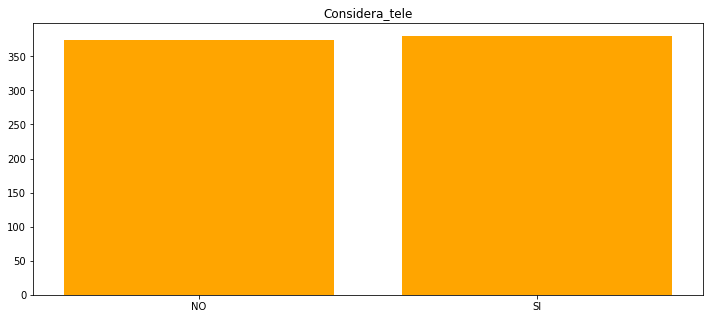

                 ID      Prop
Considera_tele               
NO              374  0.496021
SI              380  0.503979


In [7]:
ct_var = ['ID']
bar_var = ['Considera_tele']
color='orange'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

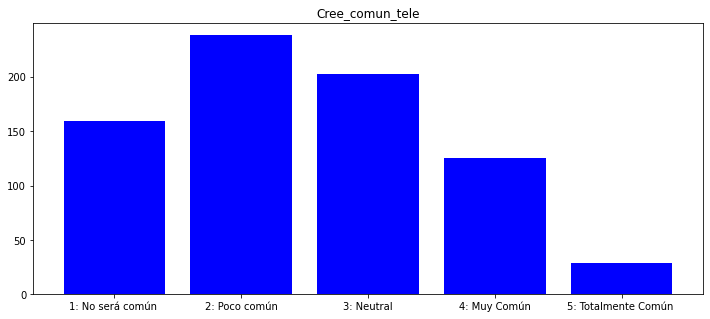

                       ID      Prop
Cree_comun_tele                    
1: No será común      159  0.210875
2: Poco común         238  0.315650
3: Neutral            203  0.269231
4: Muy Común          125  0.165782
5: Totalmente Común    29  0.038462


In [8]:
ct_var = ['ID']
bar_var = ['Cree_comun_tele']
color='blue'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

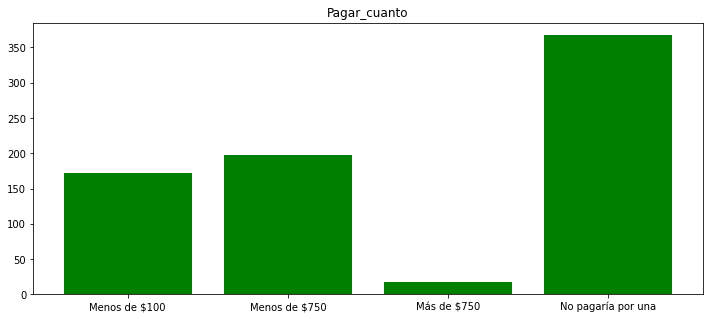

                     ID      Prop
Pagar_cuanto                     
Menos de $100       172  0.228117
Menos de $750       197  0.261273
Más de $750          18  0.023873
No pagaría por una  367  0.486737


In [9]:
ct_var = ['ID']
bar_var = ['Pagar_cuanto']
color='green'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

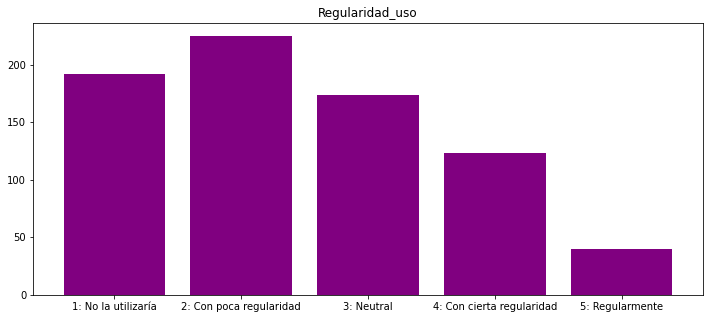

                            ID      Prop
Regularidad_uso                         
1: No la utilizaría        192  0.254642
2: Con poca regularidad    225  0.298408
3: Neutral                 174  0.230769
4: Con cierta regularidad  123  0.163130
5: Regularmente             40  0.053050


In [10]:
ct_var = ['ID']
bar_var = ['Regularidad_uso']
color='purple'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

---

## Test 1: chi-square test of independece
- **Variable 1:** doctors' expected use regularity of the platform
- **Variable 2:** doctors' perception about their patients interest to take virtual medical sessions
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [11]:
alpha = 0.1

### Variables crossing

In [12]:
rc = [
    'Cree_comun_tele',
    'Regularidad_uso',
]

ct_col = ['ID']

In [13]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Regularidad_uso,1: No la utilizaría,2: Con poca regularidad,3: Neutral,4: Con cierta regularidad,5: Regularmente
Cree_comun_tele,,,,,
1: No será común,108.0,37.0,12.0,0.0,2.0
2: Poco común,43.0,134.0,43.0,16.0,2.0
3: Neutral,24.0,43.0,97.0,35.0,4.0
4: Muy Común,11.0,11.0,20.0,67.0,16.0
5: Totalmente Común,6.0,0.0,2.0,5.0,16.0


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [14]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [15]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Regularidad_uso,1: No la utilizaría,2: Con poca regularidad,3: Neutral,4: Con cierta regularidad,5: Regularmente
Cree_comun_tele,,,,,
1: No será común,40.49,47.45,36.69,25.94,8.44
2: Poco común,60.60,71.02,54.92,38.82,12.63
3: Neutral,51.69,60.58,46.85,33.12,10.77
4: Muy Común,31.83,37.30,28.85,20.39,6.63
5: Totalmente Común,7.38,8.65,6.69,4.73,1.54


### Critical value

In [16]:
p = 1 - alpha

In [17]:
c_v = chi2.ppf(p, dof)
c_v

23.541828923096105

### Conclusion

In [18]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---

## Test 2: chi-square test of independece
- **Variable 1:** doctors' perception about the future of telemedicine
- **Variable 2:** doctors' willingness to pay for a telemedicine platform
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [19]:
alpha = 0.1

### Variables crossing

In [20]:
rc = [
    'Considera_tele',
    'Pagar_cuanto',
]

ct_col = ['ID']

In [21]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Considera_tele,,,,
NO,55,59,2,258
SI,117,138,16,109


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [22]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [23]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Considera_tele,,,,
NO,85.32,97.72,8.93,182.04
SI,86.68,99.28,9.07,184.96


### Critical value

In [24]:
p = 1 - alpha

In [25]:
c_v = chi2.ppf(p, dof)
c_v

6.251388631170325

### Conclusion

In [26]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---

## Test 3: chi-square test of independece
- **Variable 1:** doctors' perception about their patients interest to take virtual medical sessions
- **Variable 2:** doctors' willingness to pay for a telemedicine platform
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [27]:
alpha = 0.1

### Variables crossing

In [28]:
rc = [
    'Cree_comun_tele',
    'Pagar_cuanto',
]

ct_col = ['ID']

In [29]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Cree_comun_tele,,,,
1: No será común,18.0,23.0,1.0,117.0
2: Poco común,58.0,52.0,0.0,128.0
3: Neutral,56.0,61.0,4.0,82.0
4: Muy Común,32.0,51.0,9.0,33.0
5: Totalmente Común,8.0,10.0,4.0,7.0


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [30]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [31]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Cree_comun_tele,,,,
1: No será común,36.27,41.54,3.80,77.39
2: Poco común,54.29,62.18,5.68,115.84
3: Neutral,46.31,53.04,4.85,98.81
4: Muy Común,28.51,32.66,2.98,60.84
5: Totalmente Común,6.62,7.58,0.69,14.12


### Critical value

In [32]:
p = 1 - alpha

In [33]:
c_v = chi2.ppf(p, dof)
c_v

18.54934778670325

### Conclusion

In [34]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---
---